In [16]:
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

In [17]:
capacity = 1100.0
vbat = 26.0

voltageCurveSamples = [
  (-1.0, 4.4 ),
  (0.0,  4.2  ),
  (0.01, 4.05 ),
  (0.04, 3.97 ),
  (0.30, 3.82 ),
  (0.40, 3.7  ),
  (1.0,  3.45 ),
  (1.01, 3.4  ),
  (1.03, 3.3  ),
  (1.06, 3.0  ),
  (1.22, 0.0  )
]

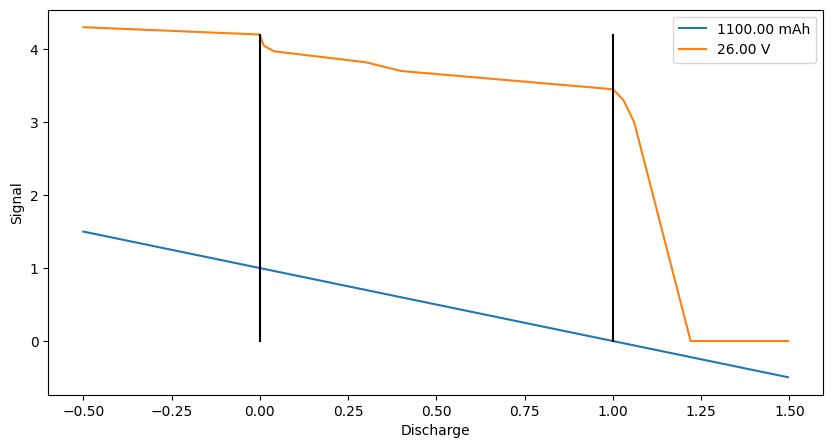

In [34]:
# calc & draw

def interpolate(x, y, i):
  return x * (1.0 - i) + y * i

def clamp(x, min, max):
  if (x < min):
    return min
  if (x > max):
    return max
  return x

def max(a, b):
  if(a > b):
    return a
  return b

#unused...
def voltageCurveGraph(capacitiyNormArray):
  voltageList = []

  for capacityVal in np.nditer(capacitiyNormArray):
    val = 0.0
    highCapFact = 32.0
    highCapEnd = 0.08

    midCapEnd = 0.7
    lowCapFact = 49.0

    capaInv = 1.0 - capacityVal

    if(capacityVal > 0.9):
      val   = 1/((highCapFact * capaInv + 1.0) * (highCapFact * capaInv + 1.0)) * highCapEnd + (1.0 - highCapEnd)
    elif(capacityVal <= 0.9 and capacityVal > 0.1):
      start = 0.935 # y start value
      val = -0.11 * capaInv + start
    elif(capacityVal <= 0.1 and capacityVal >= 0.0):
      start = 0.795 # y start value
      val   = (-1/((lowCapFact * capaInv - lowCapFact - 1) * (lowCapFact * capaInv - lowCapFact - 1)) + start) * midCapEnd + (1.0 - midCapEnd)
    elif(capacityVal < 0.0):
      val = 0.0
    voltageList.append(val * 4.2)

  return np.array(voltageList)








def voltageInterpolateCurve(voltageArray, capacitiyNormArray):
  voltageList = []

  sampleCount = len(voltageArray)

  for capacityVal in np.nditer(capacitiyNormArray):

    if sampleCount < 2:
      voltageList.append(0.0)
      continue

    # invert capacity to interpolation value rises
    i = 1.0 - capacityVal

    # clamp to outer right value
    if i >= voltageArray[sampleCount - 1][0]:
      voltageList.append(voltageArray[sampleCount - 1][1])
      continue
    
    # clamp to outer left value
    if i <= voltageArray[0][0]:
      voltageList.append(voltageArray[0][1])
      continue
    

    for index in range(1, sampleCount):
      if voltageArray[index][0] > i:
        firstSample = voltageArray[index - 1]
        secondSample = voltageArray[index]

        factor = (i - firstSample[0]) / (secondSample[0] - firstSample[0])

        voltageList.append(interpolate(firstSample[1], secondSample[1], factor ))
        break

  return np.array(voltageList)






# Fixing random state for reproducibility
frequency = 225 #20e3
delta = 1e6 / frequency

dt = delta / 1e6

time = 1

t = np.arange(-0.5, 1.5, dt)
tInv = 1.0 - (t / time)

voltageCurve =  voltageInterpolateCurve(voltageCurveSamples, tInv)


fig, (ax1) = plt.subplots(nrows=1, sharex=True, figsize=(10, 5))

#constant discharge
ax1.plot(t, tInv, label = '%.2f mAh' % capacity)
ax1.plot(t, voltageCurve, label = '%.2f V' % vbat)
ax1.legend()
ax1.set_xlabel('Discharge')
ax1.set_ylabel('Signal')

plt.plot((0.0, 0.0), (4.2, 0.0), 'k-')
plt.plot((1.0, 1.0), (4.2, 0.0), 'k-')


plt.show()